# Abandono Empleados de una empresa

### Nos proponemos entender cual es la tasa de abandono del personal de la empresa, por que es que ocurre esta desercion, formular algun plan de negocio y realizar los informes que puedan llevar a la direccion a tomar medidas correctivas

### Importamos las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from pandas_profiling import ProfileReport
from sklearn import preprocessing

### Importamos el dataset para poder analizarlo

In [2]:
df = pd.read_csv('Dataset/AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

### Empezamos el analisis exploratorio

#### Imprimimos cuales son las dimensiones

In [3]:
df.keys()

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

#### Imprimimos el Head

In [4]:
df.head(10)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
8,32,No,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,2,NaN,7,NaN,3,6
10,59,No,Travel_Rarely,Research & Development,3,Master,Medical,1,Alta,4.0,...,Baja,80,3,12,3,Muy_Alta,1,NaN,0,0
11,30,No,Travel_Rarely,Research & Development,24,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Media,80,1,1,2,NaN,1,NaN,0,0
12,38,No,Travel_Frequently,Research & Development,23,Secundaria,Life Sciences,1,Muy_Alta,2.0,...,Media,80,0,10,2,NaN,9,NaN,1,8


#### Imprimimos el Tail

In [5]:
df.tail()

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3
2065,49,No,Travel_Frequently,Sales,2,Secundaria,Medical,1,Muy_Alta,NaN,...,Muy_Alta,80,0,17,3,NaN,9,NaN,0,8
2068,34,No,Travel_Rarely,Research & Development,8,NaN,Medical,1,Media,4.0,...,Baja,80,0,6,3,Muy_Alta,4,NaN,1,2


#### Imprimimos la informacion general del dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

#### Vemos cual es la descripcion de las variables numericas

In [7]:
df.describe()

,edad,distancia_casa,empleados,sexo,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
count,1470.000000,1470.000000,1470.0,1271.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,232.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1.0,2.727773,2.063946,6502.931293,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,2.771552,2.187755,4.123129
std,9.135373,8.106864,0.0,0.720788,1.106940,4707.956783,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,0.705244,3.222430,3.568136
min,18.000000,1.000000,1.0,1.000000,1.000000,1009.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,2.000000,1.0,2.000000,1.000000,2911.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1.0,3.000000,2.000000,4919.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1.0,3.000000,3.000000,8379.000000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,3.000000,3.000000,7.000000
max,60.000000,29.000000,1.0,4.000000,5.000000,19999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,4.000000,15.000000,17.000000


#### Vemos la descripcion de las variables categoricas

In [8]:
df.describe(include=['O'])

,abandono,viajes,departamento,educacion,carrera,satisfaccion_entorno,implicacion,puesto,satisfaccion_trabajo,estado_civil,mayor_edad,horas_extra,evaluacion,satisfaccion_companeros,conciliacion
count,1470,1470,1470,1369,1470,1470,1452,1470,1394,1470,1470,1470,1470,1470,459
unique,2,3,3,4,6,4,4,9,4,3,1,2,2,4,4
top,No,Travel_Rarely,Research & Development,Universitaria,Life Sciences,Alta,Alta,Sales Executive,Alta,Married,Y,No,Alta,Alta,Alta
freq,1233,1043,961,814,606,453,857,326,828,673,1470,1054,1244,459,257


#### Usamos librerias como profiling para hacer un analisis exploratorio antes de realizar cambios en el data set para seguir entendiendolo mejor

In [9]:
prof = ProfileReport(df) 
prof.to_file('dataset_original.html')

### Una vez que entendemos el dataframe comenzamos la limpieza del mismo

#### Empezaremos la limpieza analizando los null

In [10]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

#### Tomamos la desicion de borrar las columnas anos_en_el_puesto y conciliacion por la gran falta de datos

In [11]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)

#### Analizamos la columna sexo

In [12]:
df['sexo'].unique()

array([ 3.,  2.,  4., nan,  1.])

In [13]:
df.pivot_table(index = ['sexo'], aggfunc ='size').sort_values(ascending = False)

sexo
3.0    739
2.0    328
4.0    130
1.0     74
dtype: int64

#### Viendo que el sexo con mas frecuencia es el 3.0 tomaremos la desicion de llenar los null con este valor 

In [14]:
df.sexo=df.sexo.fillna(3.0)

#### Ya que estamos con esta columna la convertimos en Int ya qu no tiene sentido que sea float

In [15]:
df.sexo = df.sexo.astype(int)

#### La siguiente dimension a analizar es Educacion

In [16]:
df['educacion'].unique()

array(['Universitaria', 'Secundaria', 'Master', 'Primaria', nan],
      dtype=object)

In [17]:
df.pivot_table(index = ['educacion'], aggfunc ='size').sort_values(ascending = False)

educacion
Universitaria    814
Secundaria       348
Master           130
Primaria          77
dtype: int64

#### Con el mismo criterio llenaremos los null con el valor mas frecuente

In [18]:
df.educacion=df.educacion.fillna('Universitaria')

#### La siguiente dimension es satisfaccion_trabajo

In [19]:
df['satisfaccion_trabajo'].unique()

array(['Alta', 'Media', 'Muy_Alta', nan, 'Baja'], dtype=object)

In [20]:
df.pivot_table(index = ['satisfaccion_trabajo'], aggfunc ='size').sort_values(ascending = False)

satisfaccion_trabajo
Alta        828
Media       354
Muy_Alta    136
Baja         76
dtype: int64

#### Al no tener referencias para completar los null de otra manera seguimos con el criterio mas sencillo

In [21]:
df.satisfaccion_trabajo=df.satisfaccion_trabajo.fillna('Alta')

#### La ultima dimension a analizar es implicacion

In [22]:
df['implicacion'].unique()

array(['Alta', 'Media', 'Muy_Alta', 'Baja', nan], dtype=object)

In [23]:
df.pivot_table(index = ['implicacion'], aggfunc ='size').sort_values(ascending = False)

implicacion
Alta        857
Media       368
Muy_Alta    144
Baja         83
dtype: int64

In [24]:
df.implicacion=df.implicacion.fillna('Alta')

#### Terminada la busqueda y eliminacion de nulos buscaremos los registros duplicados

In [25]:
df.duplicated().count()

1470

#### Realizamos la grafica de frecuencia para cada una de las dimensiones


In [26]:
def graficos_frecuencia_categoricos(variables_categoricas):
    for variable in variables_categoricas:
        plt.figure(figsize=(20,6))
        plt.bar(df[variable].value_counts().index, df[variable].value_counts())
        plt.title(variable)
        plt.show()

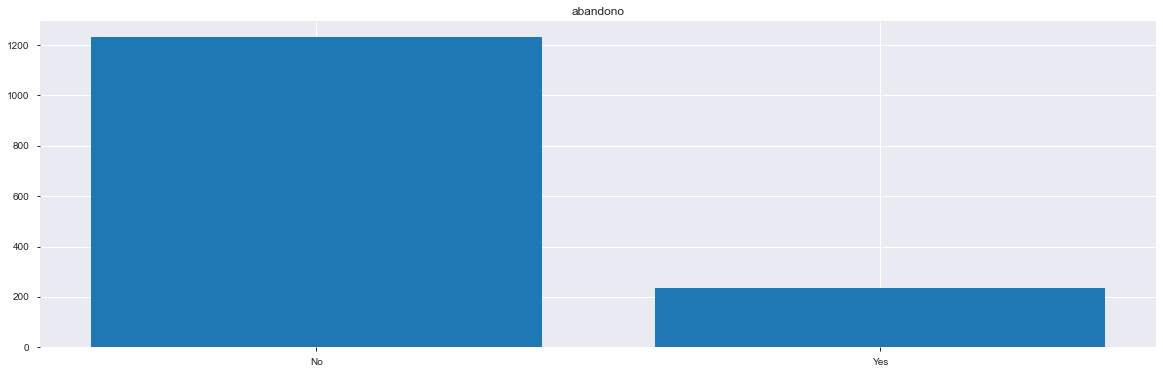

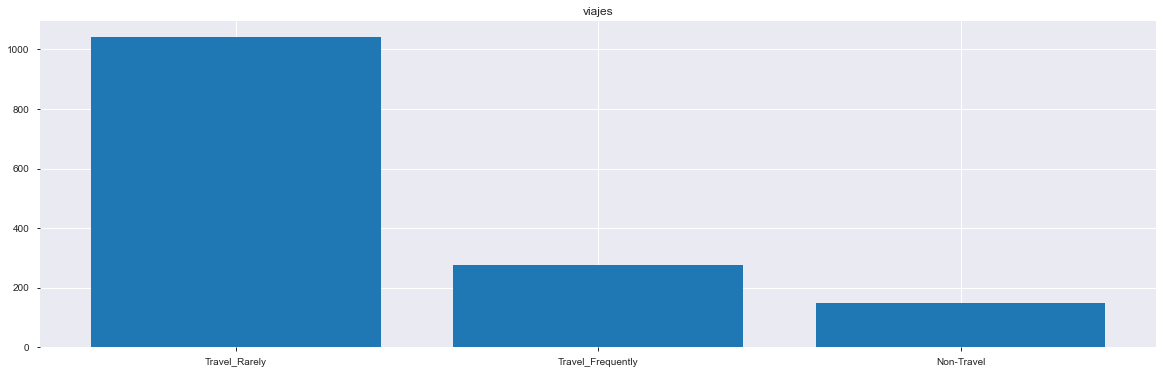

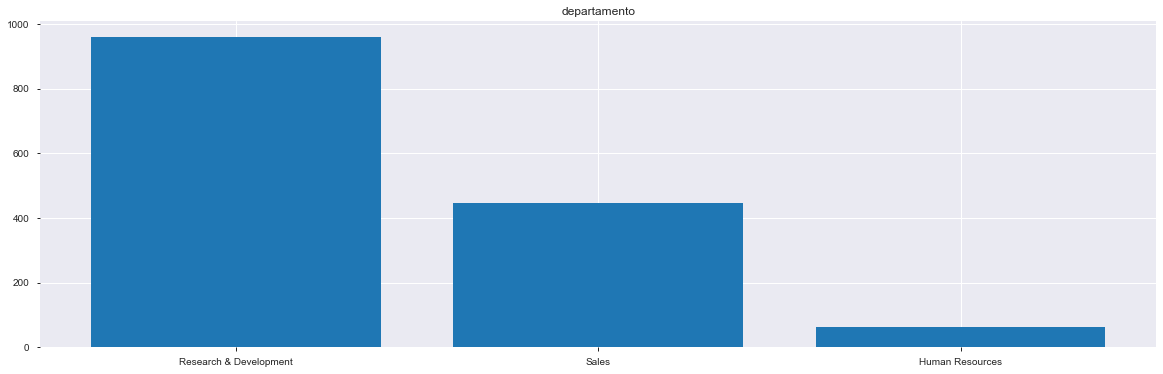

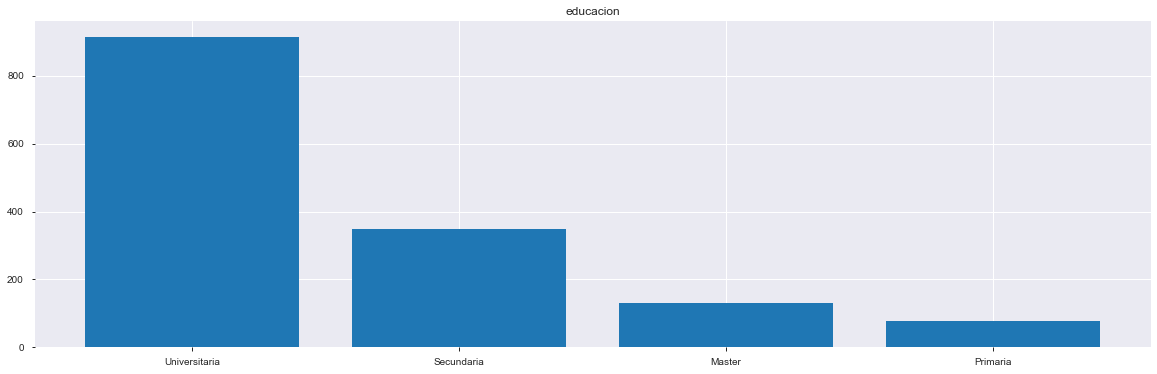

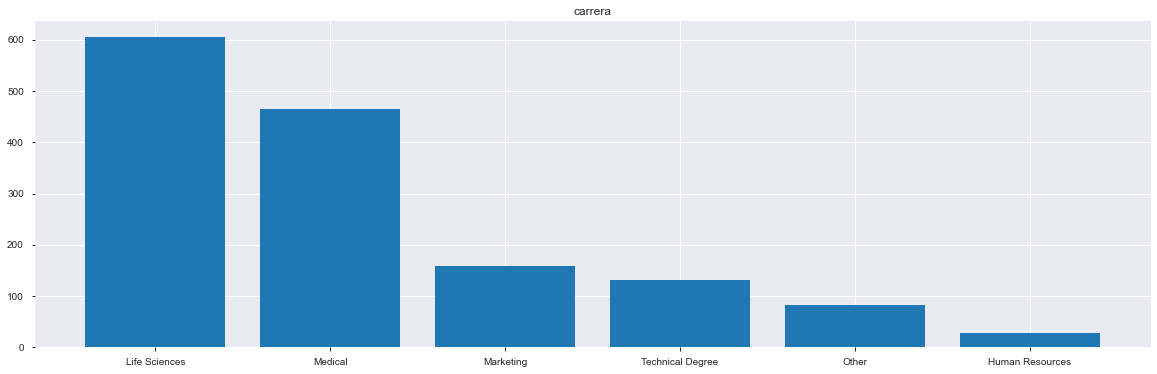

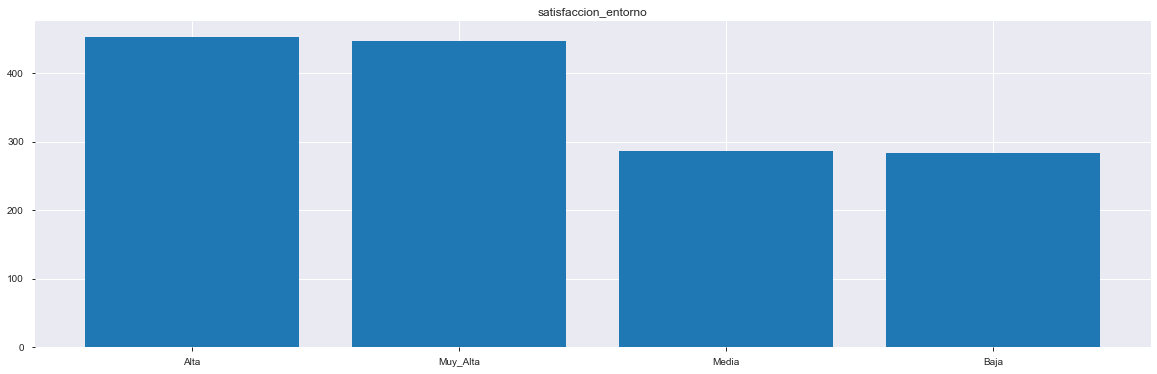

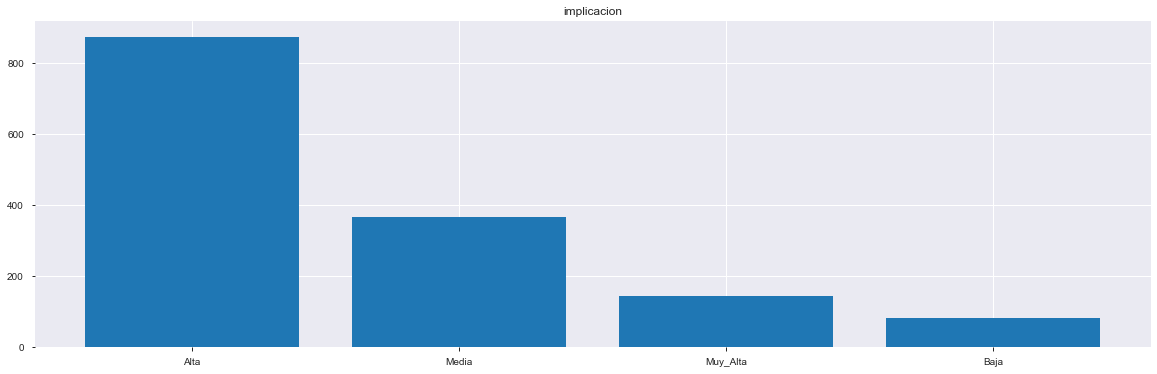

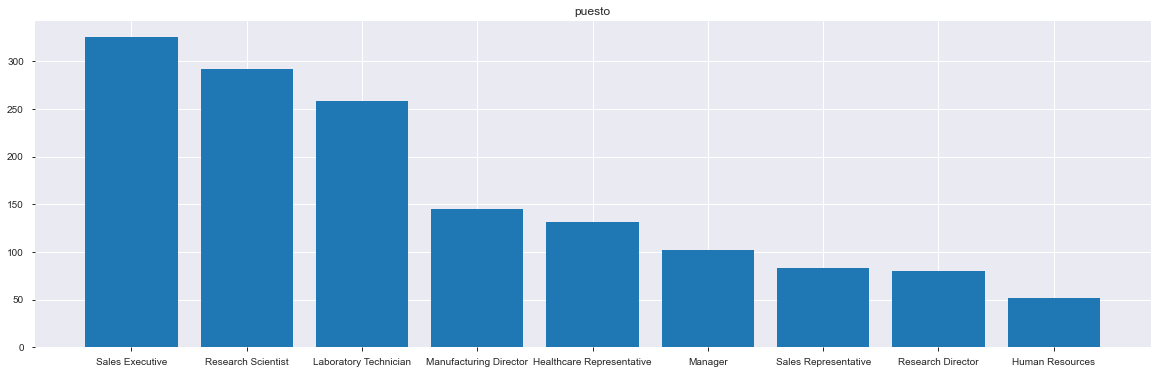

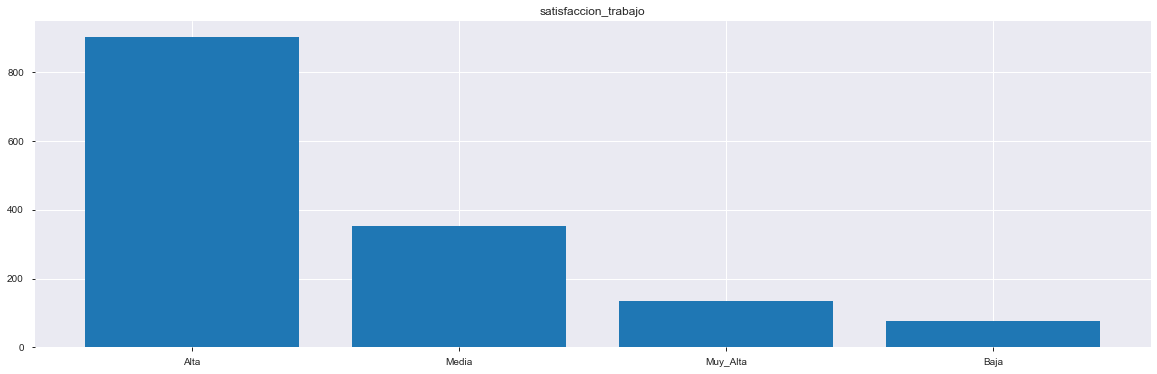

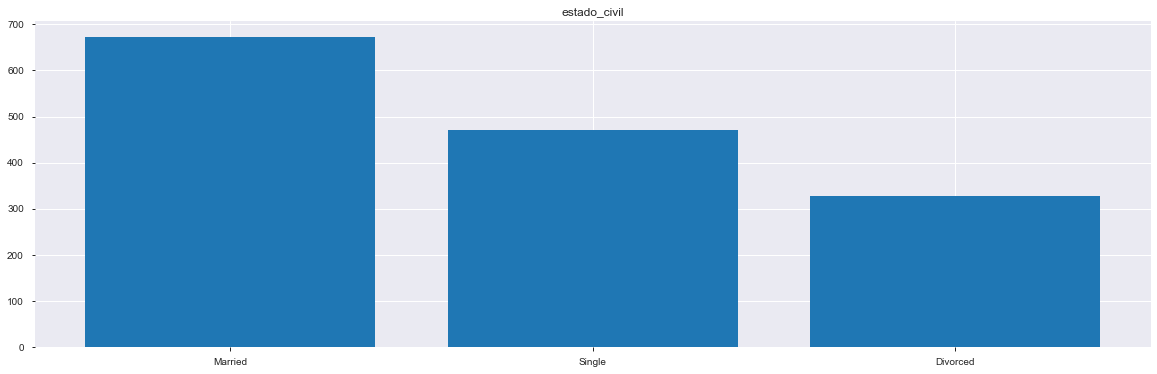

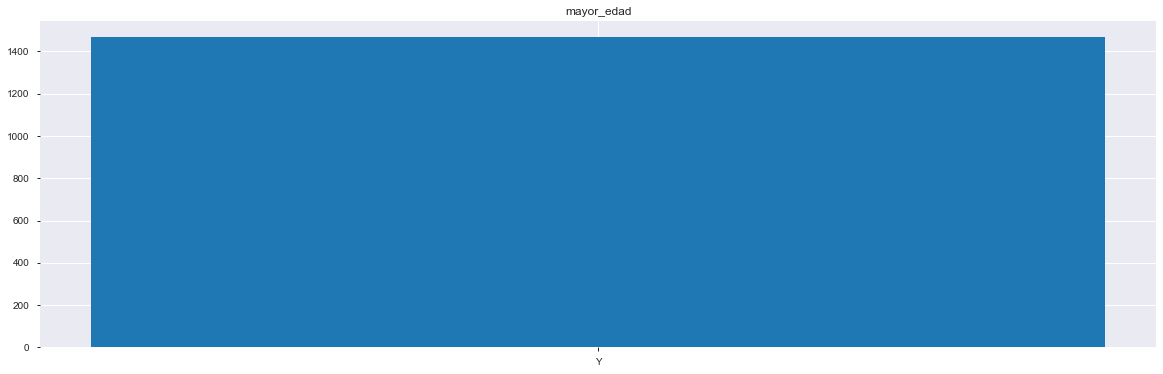

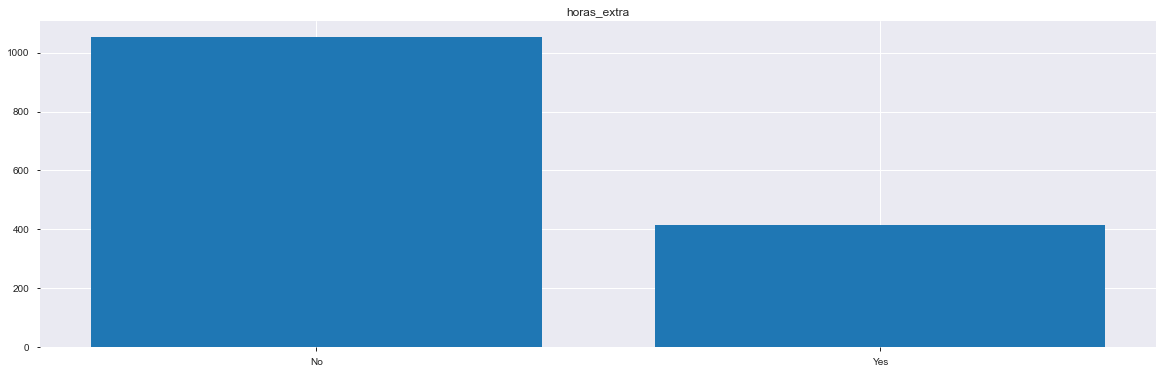

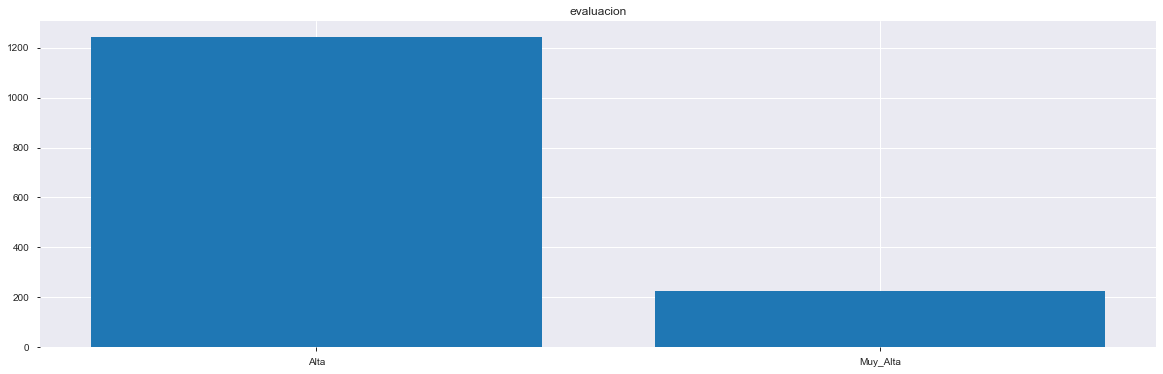

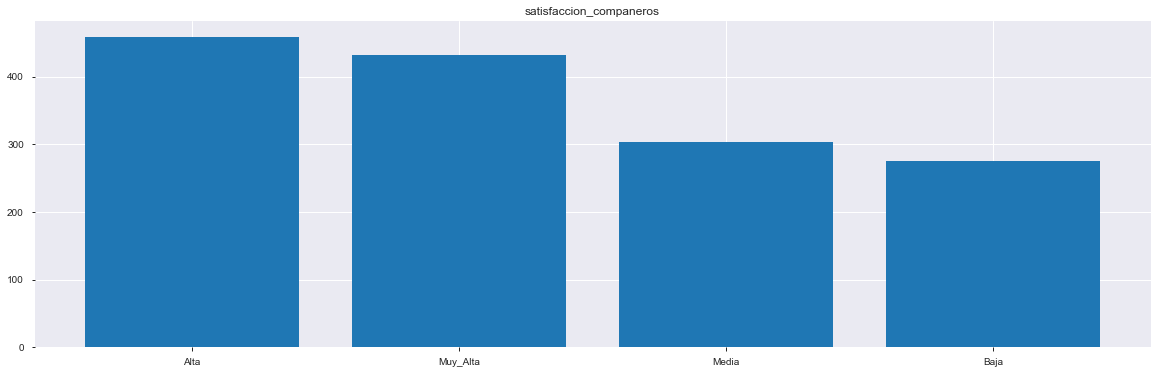

In [27]:
graficos_frecuencia_categoricos(df.select_dtypes('O'))

In [28]:
def graficos_frecuencia_numericos(variables_numericas):
    for variable in variables_numericas:
        plt.figure(figsize=(20,6))
        plt.hist(df[variable],bins=20)
        plt.title(variable)
        plt.show()

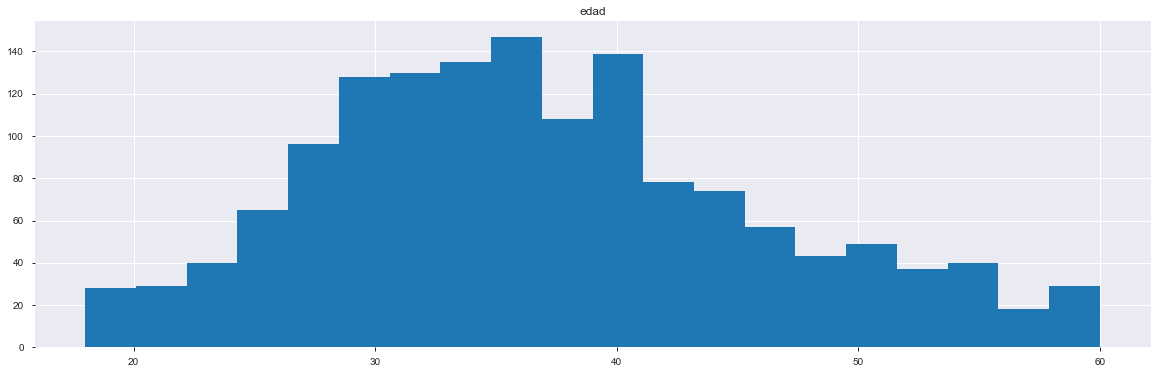

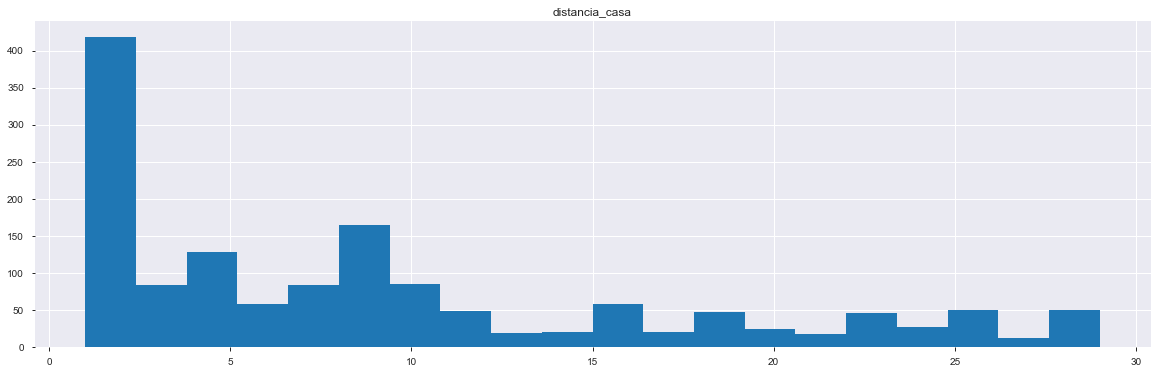

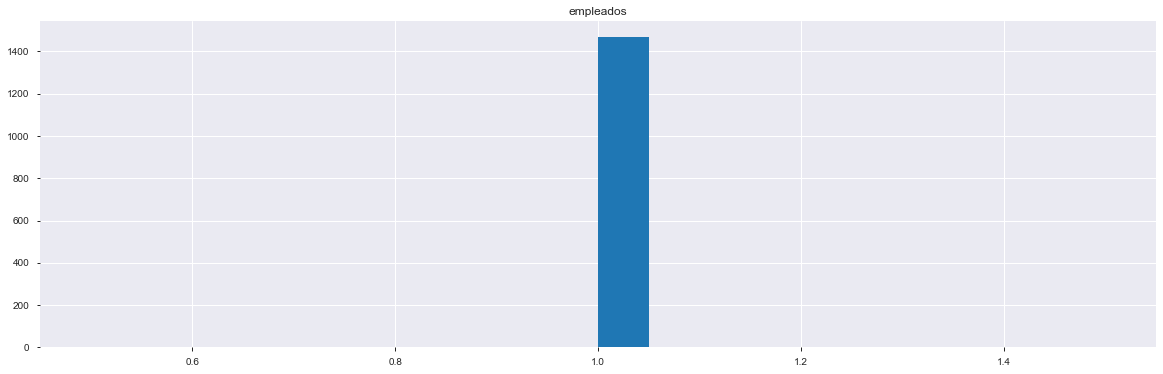

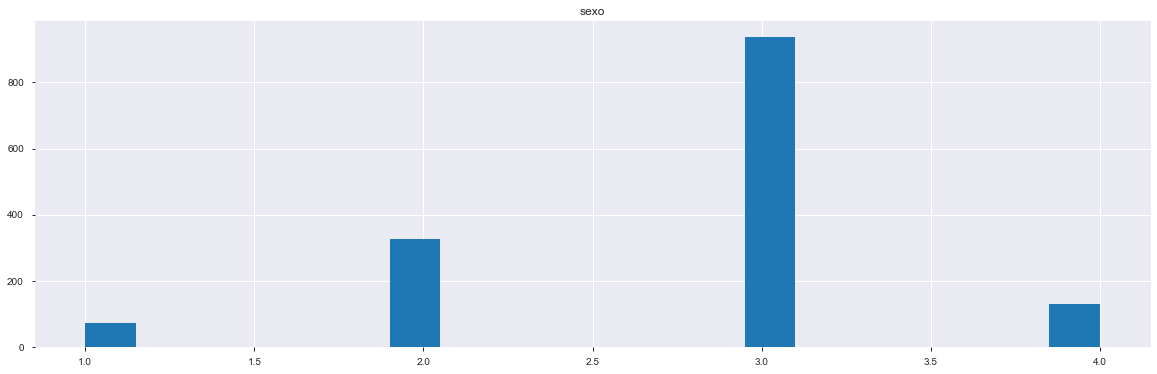

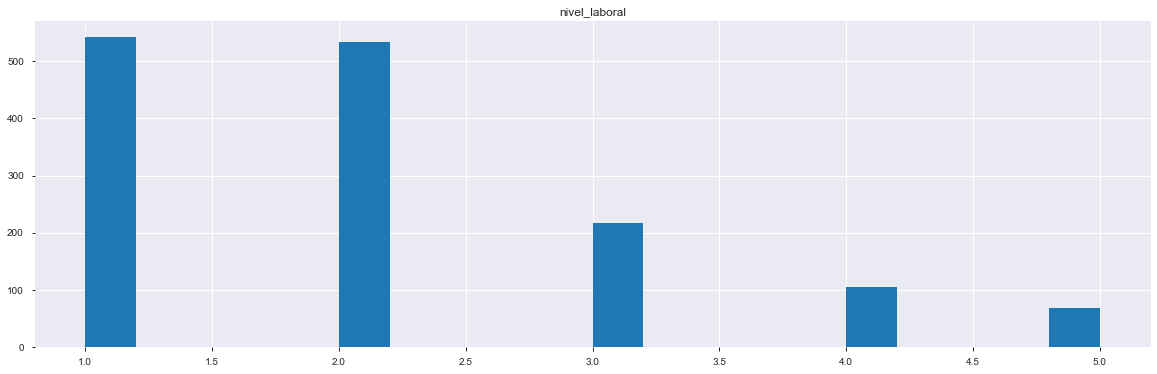

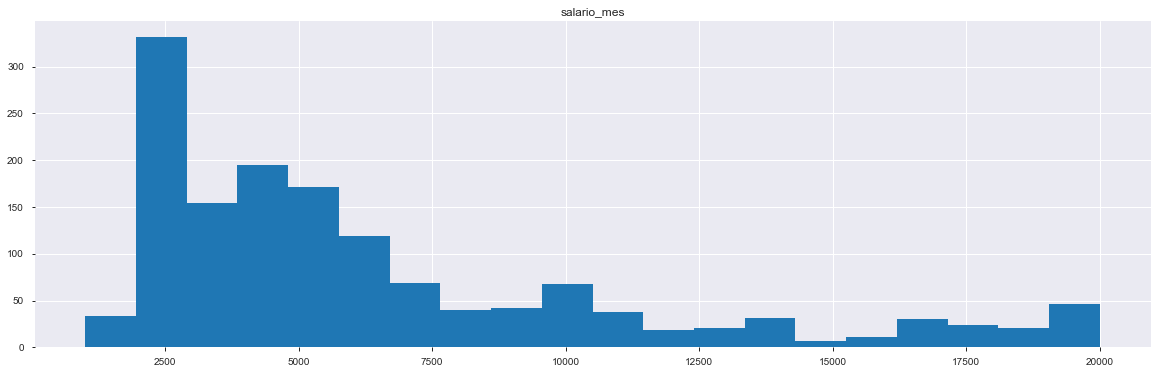

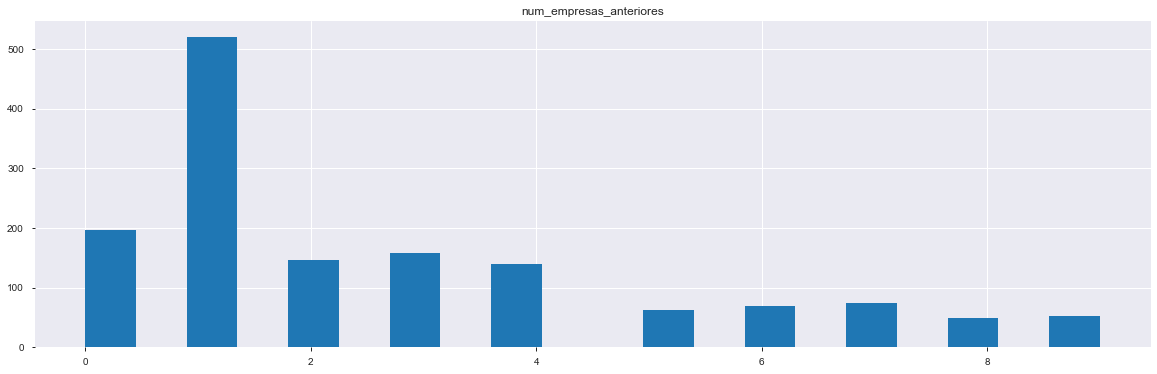

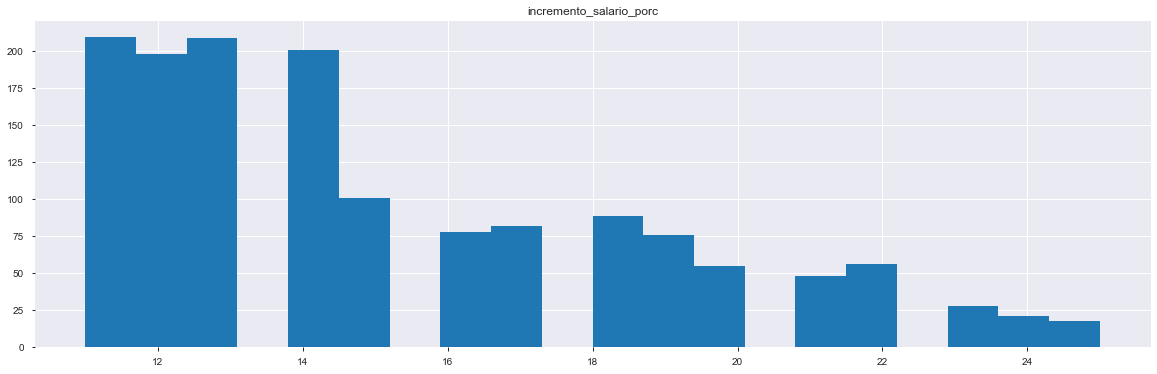

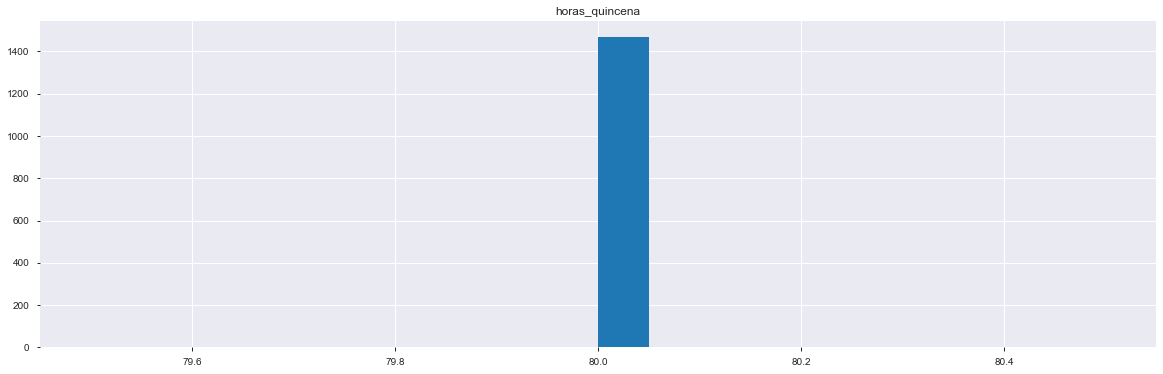

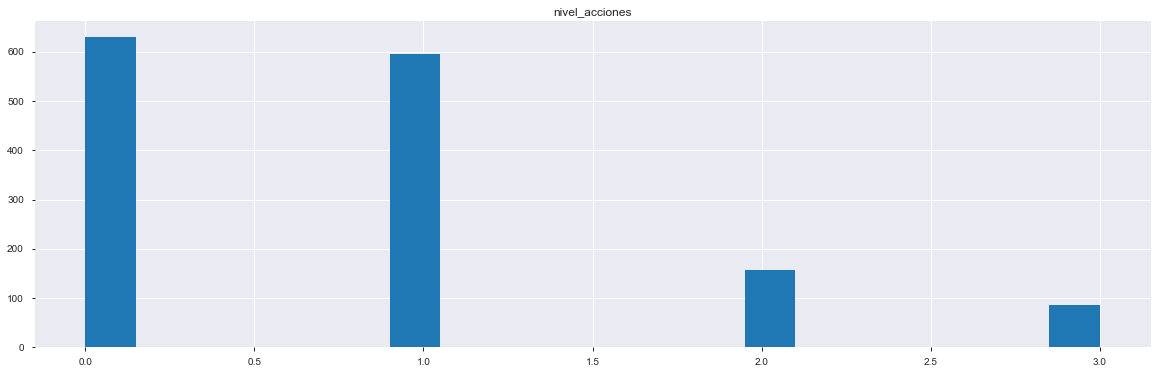

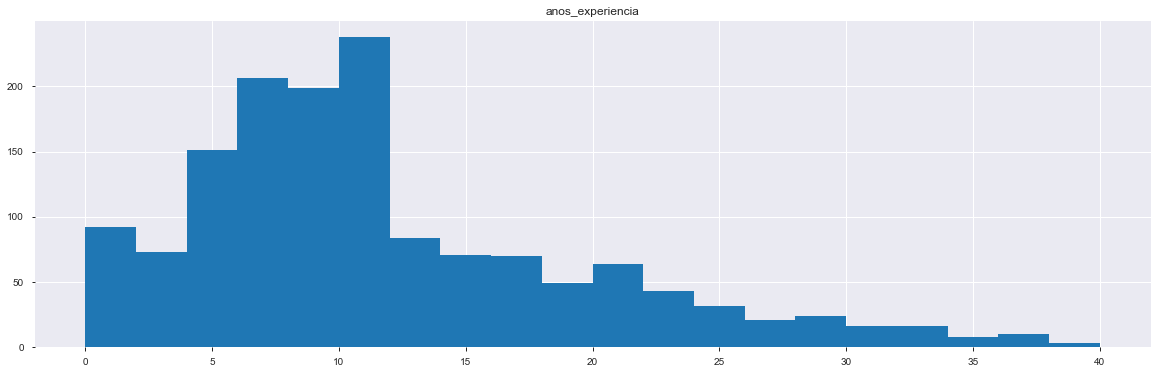

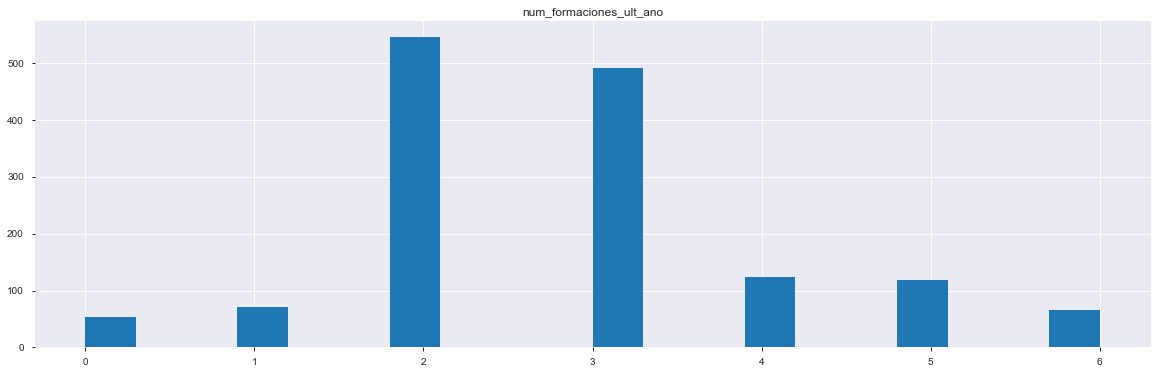

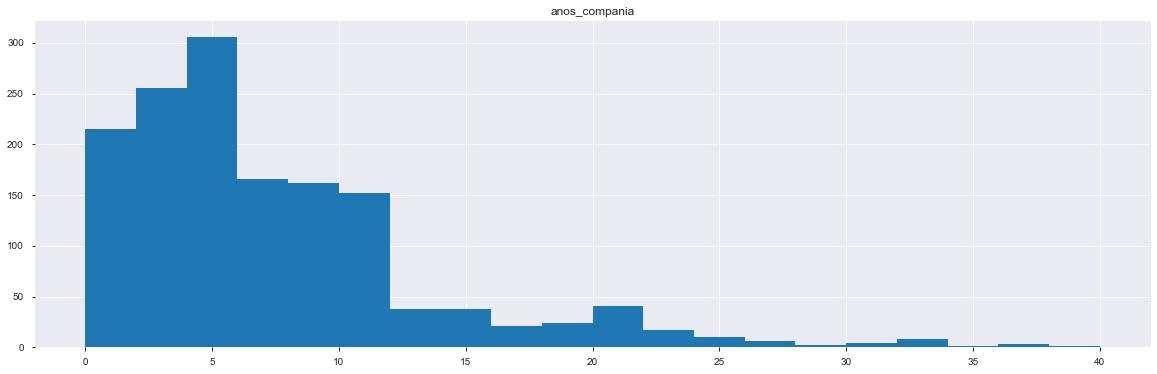

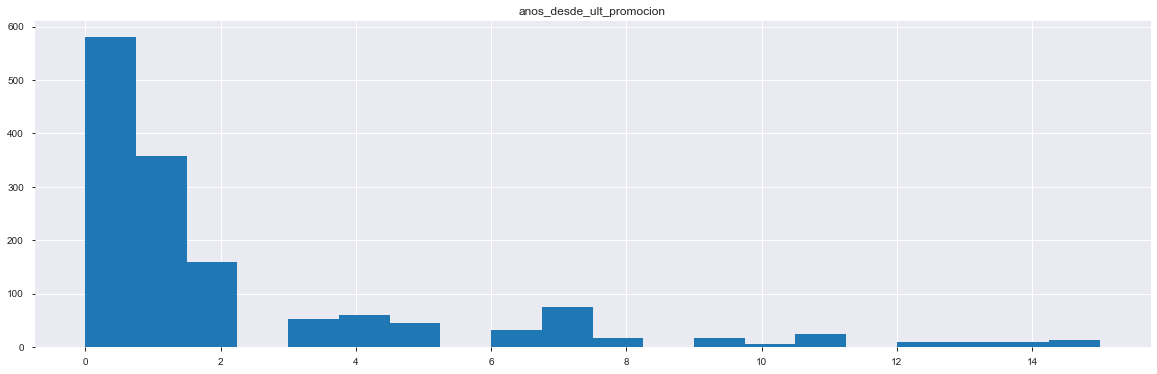

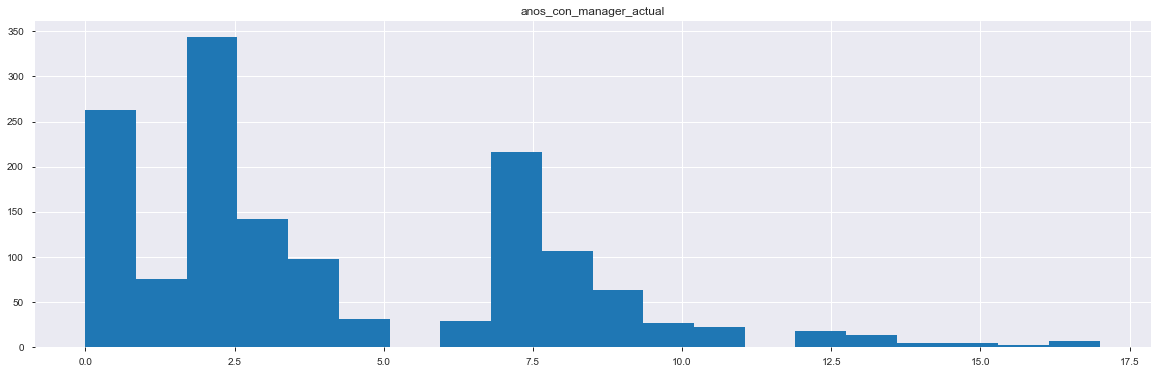

In [29]:
graficos_frecuencia_numericos(df.select_dtypes(exclude='O'))

#### Con estos graficos de frecuencia notamos que las dimensiones mayor_edad, horas_quincena y empleados tiene solo un valor, lo que no aporta ningun valor y por lo que podemos eliminarla

In [30]:
df.drop(columns = ['mayor_edad','horas_quincena','empleados'], inplace = True)

#### Otro grafico que nos puede ayudar mucho a entender nuestro problema es la correlacion de las variables con nuestra variable target que en este caso es abandono

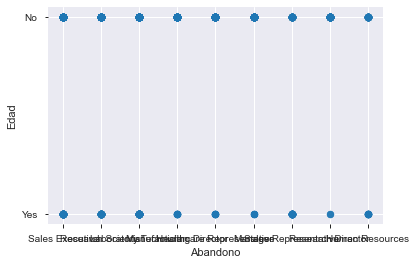

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df.puesto, y=df.abandono, alpha= 0.8)
ax.set_xlabel('Abandono')
ax.set_ylabel('Edad');

In [31]:
df.isna().sum().sort_values(ascending = False)

edad                        0
abandono                    0
anos_desde_ult_promocion    0
anos_compania               0
num_formaciones_ult_ano     0
anos_experiencia            0
nivel_acciones              0
satisfaccion_companeros     0
evaluacion                  0
incremento_salario_porc     0
horas_extra                 0
num_empresas_anteriores     0
salario_mes                 0
estado_civil                0
satisfaccion_trabajo        0
puesto                      0
nivel_laboral               0
implicacion                 0
sexo                        0
satisfaccion_entorno        0
carrera                     0
educacion                   0
distancia_casa              0
departamento                0
viajes                      0
anos_con_manager_actual     0
dtype: int64